In [1]:
import pandas as pd

# Carregar os dados
df = pd.read_excel("../data/dados_estudo_nota.xlsx")
df


,id,estudo,nota
0,1,1,0.75
1,2,1,3.00
2,3,2,1.75
3,4,3,1.75
4,5,4,4.20
5,6,4,6.50
6,7,5,2.90
7,8,6,6.20
8,9,6,7.00
9,10,7,6.20


In [ ]:
# Esta parte é feita com  Modelo de Rregressão
df['Aprovado'] = df["nota"] >= 5

features = ['estudo']
target = 'Aprovado'
# %%
from sklearn import linear_model
reg = linear_model.LogisticRegression(penalty=None,
                                      fit_intercept=True)
# Aqui o modelo aprende
reg.fit(df[features], df[target])

# aqui o modelo vai fazer a previsão
reg_predict = reg.predict(df[features])
reg_predict

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [4]:
from sklearn import metrics

# comparamos o valor verdadeiro(df[target]) valor com o valor que o modelo preveu(reg_predict)
reg_acc = metrics.accuracy_score(df[target], reg_predict)
print("Acurácia Reg Log.:", reg_acc)

# Calculo da Previsão
reg_precision = metrics.precision_score(df[target], reg_predict)
print("Precisão Reg Log.:", reg_precision)

reg_recall = metrics.recall_score(df[target], reg_predict)
print("Recall Reg Log.:", reg_recall)

# Matrix de confusão
reg_conf = metrics.confusion_matrix(df[target], reg_predict)
reg_conf = pd.DataFrame(reg_conf,
                        index=['False', 'True'],
                        columns=['False', 'True'],)

print(reg_conf)

Acurácia Reg Log.: 0.8666666666666667
Precisão Reg Log.: 0.8888888888888888
Recall Reg Log.: 0.8888888888888888
       False  True
False      5     1
True       1     8


In [5]:
# Esta parte é feita com  Modelo de Arvore
from sklearn import tree
arvore = tree.DecisionTreeClassifier(max_depth=3)

# aqui o modelo aprende
arvore.fit(df[features], df[target])

# aqui o modelo prevê
arvore_predict = arvore.predict(df[features])
arvore_predict

arvore_acc = metrics.accuracy_score(df[target], arvore_predict)
print("Acurácia Árvore:", arvore_acc)

arvore_precision = metrics.precision_score(df[target], arvore_predict)
print("Precisão Árvore:", arvore_precision)

arvore_recall = metrics.recall_score(df[target], arvore_predict)
print("Recall Árvore:", arvore_recall)

arvore_conf = metrics.confusion_matrix(df[target], arvore_predict)
arvore_conf

Acurácia Árvore: 0.9333333333333333
Precisão Árvore: 1.0
Recall Árvore: 0.8888888888888888


array([[6, 0],
       [1, 8]])

In [6]:
# Esta parte é feita com  Modelo Naive_Bayes
from sklearn import naive_bayes
nb = naive_bayes.GaussianNB()

# aqui o modelo aprende
nb.fit(df[features], df[target])

# aqui o modelo esta a aprender
nb_predict = nb.predict(df[features])
nb_predict

nb_acc = metrics.accuracy_score(df[target], nb_predict)
print("Acurácia Naive Bayes:", nb_acc)

nb_precision = metrics.precision_score(df[target], nb_predict)
print("Precisão Naive Bayes:", nb_precision)

nb_recall = metrics.recall_score(df[target], nb_predict)
print("Recall NB:", nb_recall)

nb_conf = metrics.confusion_matrix(df[target], nb_predict)
nb_conf


Acurácia Naive Bayes: 0.8666666666666667
Precisão Naive Bayes: 0.8888888888888888
Recall NB: 0.8888888888888888


array([[5, 1],
       [1, 8]])

In [8]:
nb_proba = nb.predict_proba(df[features])[:,1]
nb_predict = nb_proba > 0.2

nb_acc = metrics.accuracy_score(df[target], nb_predict)
print("Acurácia Naive Bayes:", nb_acc)

nb_precision = metrics.precision_score(df[target], nb_predict)
print("Precisão Naive Bayes:", nb_precision)

nb_recall = metrics.recall_score(df[target], nb_predict)
print("Recall NB:", nb_recall)



Acurácia Naive Bayes: 0.8666666666666667
Precisão Naive Bayes: 0.8181818181818182
Recall NB: 1.0


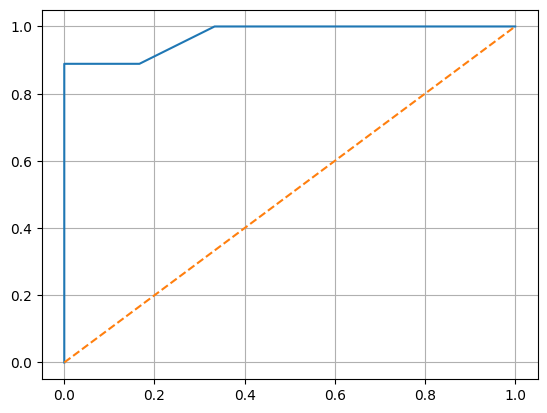

In [9]:
# Curva Roc
roc_curve = metrics.roc_curve(df[target], nb_proba)
plt.plot(roc_curve[0], roc_curve[1] )
plt.grid(True)
plt.plot([0,1], [0,1], '--')
plt.show()


In [10]:
roc_auc = metrics.roc_auc_score(df[target], nb_proba)
roc_auc


np.float64(0.9722222222222223)